# Chicago Car Crashes: Exploratory Data Analysis


The Chicago Data Portal provides datasets containing details of car crashes from 2013-present. We use two of these datasets:
 - [crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if) contains details of each crash incident
 - [people](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d) contains details of each individual involved in each crash incident

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import datasets
crashes_df = pd.read_csv('./data/Traffic_Crashes_-_Crashes.csv')
people_df = pd.read_csv('./data/Traffic_Crashes_-_People.csv')

In [3]:
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                541142 non-null  object 
 1   RD_NO                          536550 non-null  object 
 2   CRASH_DATE_EST_I               41029 non-null   object 
 3   CRASH_DATE                     541142 non-null  object 
 4   POSTED_SPEED_LIMIT             541142 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 6   DEVICE_CONDITION               541142 non-null  object 
 7   WEATHER_CONDITION              541142 non-null  object 
 8   LIGHTING_CONDITION             541142 non-null  object 
 9   FIRST_CRASH_TYPE               541142 non-null  object 
 10  TRAFFICWAY_TYPE                541142 non-null  object 
 11  LANE_CNT                       198968 non-null  float64
 12  ALIGNMENT                     

In [5]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [6]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195747 non-null  object 
 1   PERSON_TYPE            1195747 non-null  object 
 2   CRASH_RECORD_ID        1195747 non-null  object 
 3   RD_NO                  1185613 non-null  object 
 4   VEHICLE_ID             1172146 non-null  float64
 5   CRASH_DATE             1195747 non-null  object 
 6   SEAT_NO                244512 non-null   float64
 7   CITY                   879728 non-null   object 
 8   STATE                  890189 non-null   object 
 9   ZIPCODE                803192 non-null   object 
 10  SEX                    1177665 non-null  object 
 11  AGE                    852450 non-null   float64
 12  DRIVERS_LICENSE_STATE  705542 non-null   object 
 13  DRIVERS_LICENSE_CLASS  608027 non-null   object 
 14  SAFETY_EQUIPMENT  

Looking at the distribution of our target classes:

In [7]:
people_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

<AxesSubplot:>

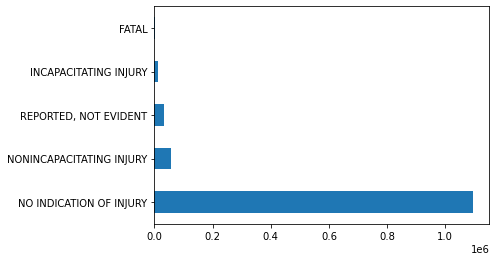

In [8]:
people_df.INJURY_CLASSIFICATION.value_counts().plot.barh()

## EDA

**Crashes:**

We drop columns for which the distribution isn't relevant or informative. For instance, `'CRASH_RECORD_ID'` is simply a unique identifier in the dataset. The information in `'PHOTOS_TAKEN_I'` describes police action performed after the crash that does not have any bearing on the severity of injury resulting from a crash.

In [9]:
crashes_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [10]:
crashes_eda = crashes_df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 
                               'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                               'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'INJURIES_UNKNOWN', 
                               'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)

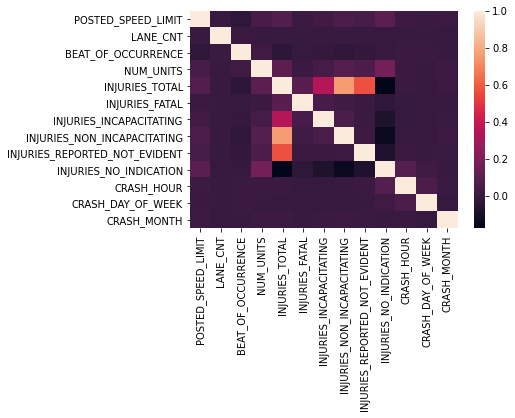

In [11]:
# Are certain factors correlated with severity of injuries?
sns.heatmap(crashes_eda.corr());

Looks like there aren't any standout features that correlate strongly (or at all!) with any count of injuries (of any severity).

Let's look at some distributions of variables overall:

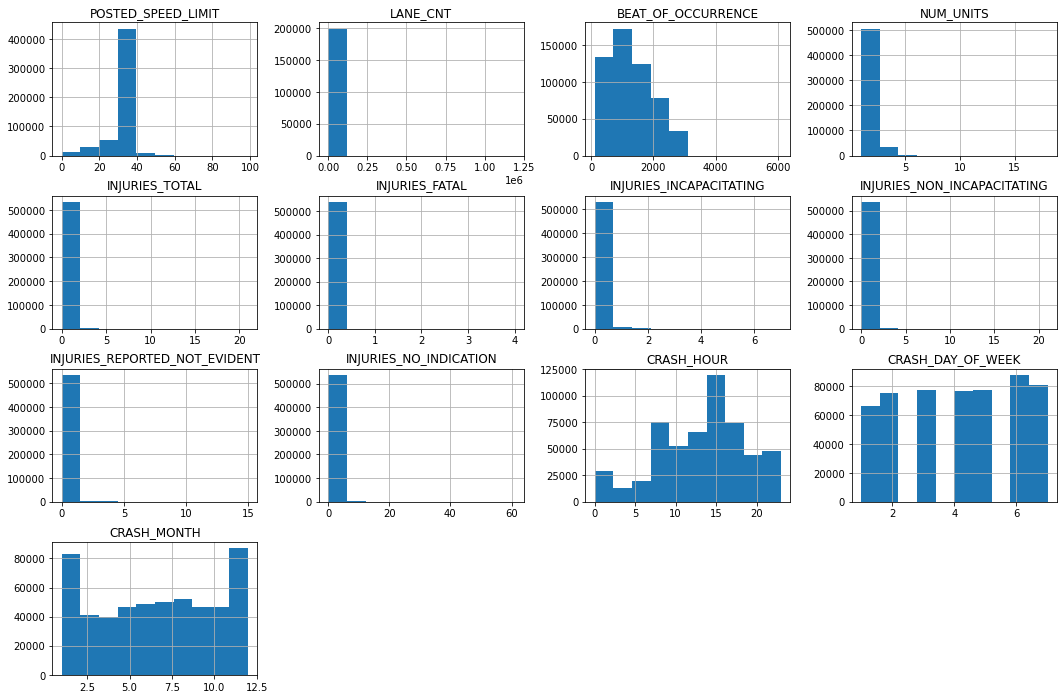

In [12]:
# Numeric variables
crashes_eda.hist(figsize=(18, 12));

Ultimately this has limited utility since none of these are truly continous variables and most are just numeric categoricals (like `'CRASH_MONTH'` and `'CRASH_DAY'`).

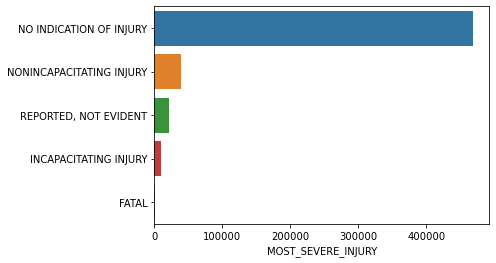

In [13]:
# Target values by crash
sns.barplot(y=crashes_eda.MOST_SEVERE_INJURY.value_counts().index, x=crashes_eda.MOST_SEVERE_INJURY.value_counts(),
           orient='h');

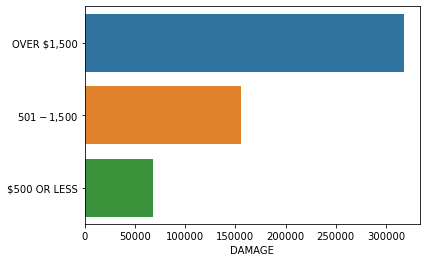

In [14]:
# Total damage in dollars
sns.barplot(y=crashes_eda.DAMAGE.value_counts().index, x=crashes_eda.DAMAGE.value_counts(), orient='h');

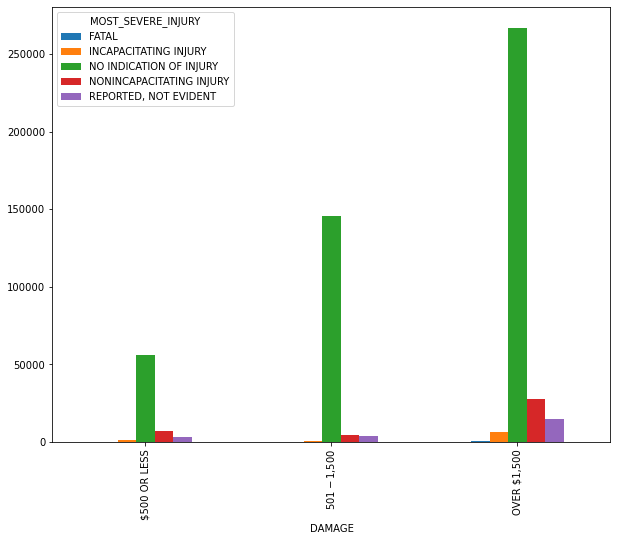

In [15]:
# Total damage disaggregated by most severe injury resulting from a crash
pd.crosstab(crashes_eda.DAMAGE, crashes_eda.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

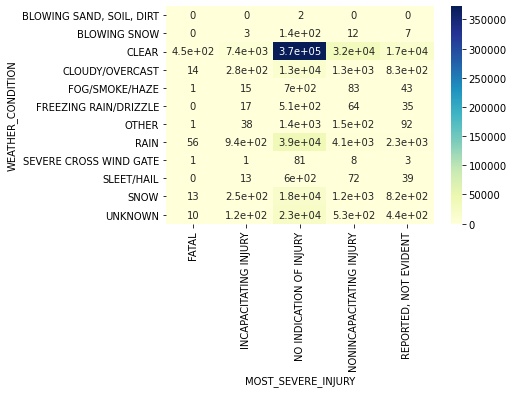

In [16]:
# How might weather affect the severity of injury resulting from a crash?
sns.heatmap(pd.crosstab(crashes_eda.WEATHER_CONDITION, 
                        crashes_eda.MOST_SEVERE_INJURY), 
            annot=True, cmap="YlGnBu");

**People:**

Rather than total injuries or most severe injury per crash, the `people` dataset provides information at the individual level. Once again, we drop irrelevant/uninformative columns.

In [17]:
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [18]:
people_eda = people_df.drop(['PERSON_ID', 'RD_NO', 'CRASH_RECORD_ID', 'HOSPITAL',
                             'EMS_AGENCY', 'EMS_RUN_NO'], axis=1)

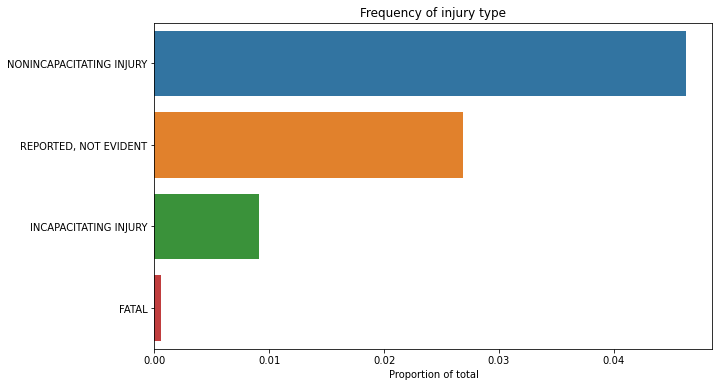

In [19]:
# Distribution of our target classes
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=people_df.INJURY_CLASSIFICATION.value_counts(normalize=True).drop('NO INDICATION OF INJURY').index, 
            x=people_df.INJURY_CLASSIFICATION.value_counts(normalize=True).drop('NO INDICATION OF INJURY'),
           orient='h', ax=ax)
plt.title('Frequency of injury type')
plt.xlabel('Proportion of total');

Some features, such as `'DRIVER_ACTION'` and `'BAC_RESULT'` seem like they would obviously be important factors.

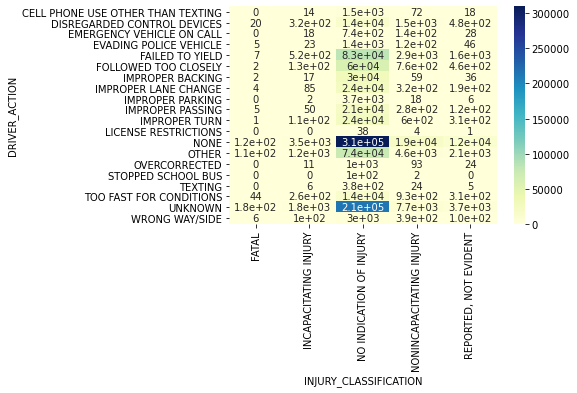

In [20]:
sns.heatmap(pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION),
            annot=True, cmap="YlGnBu");

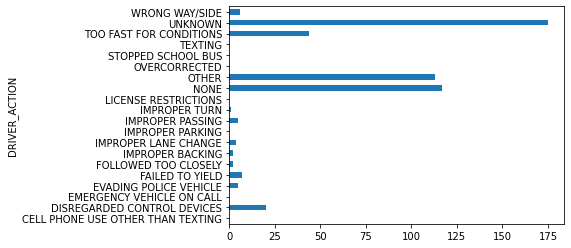

In [21]:
# Driver action with fatalities
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['FATAL'].plot.barh();

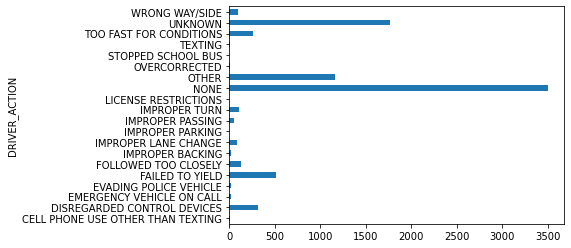

In [22]:
# Driver action with inapacitating injuries
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['INCAPACITATING INJURY'].plot.barh();

It's difficult to draw conclusions when the most populous categories are "None," "Other," and "Unknown."

In [23]:
# Distribution of breathalyzer tests
people_eda.BAC_RESULT.value_counts()

TEST NOT OFFERED                   935453
TEST REFUSED                        10368
TEST PERFORMED, RESULTS UNKNOWN      2422
TEST TAKEN                           1813
Name: BAC_RESULT, dtype: int64

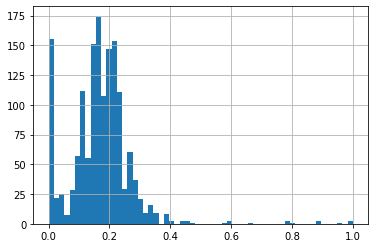

In [24]:
people_eda['BAC_RESULT VALUE'].hist(bins='auto');

The vast majority of results are well below the legal limit.

Let's look at age.

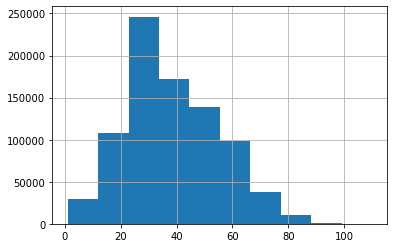

In [25]:
people_eda[people_eda['AGE'] > 0]['AGE'].hist();

In [26]:
people_eda['AGE_BINS'] = pd.cut(x=people_eda['AGE'], bins=[16, 19, 29, 39, 49, 59, 69, 79, 89, 99])

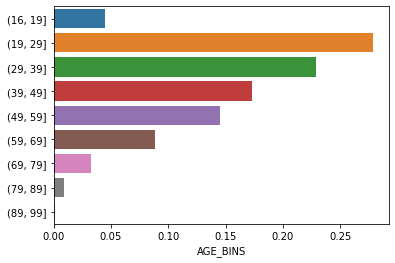

In [27]:
sns.barplot(y=people_eda.AGE_BINS.value_counts(normalize=True).index, x=people_eda.AGE_BINS.value_counts(normalize=True),
           orient='h');

How does age relate to level of injury?

In [28]:
pd.crosstab(people_eda.AGE_BINS, people_eda.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
AGE_BINS,,,,,
"(16, 19]",21,504,30978,2910,1429
"(19, 29]",150,2660,196435,14489,7844
"(29, 39]",116,1972,163628,10231,6019
"(39, 49]",79,1375,124801,6957,4369
"(49, 59]",68,1353,103692,6145,4006
"(59, 69]",52,907,63066,3984,2404
"(69, 79]",25,386,23308,1481,798
"(79, 89]",17,126,6389,468,231
"(89, 99]",4,15,720,58,23


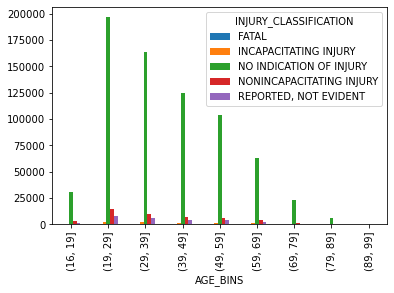

In [29]:
pd.crosstab(people_eda.AGE_BINS, people_eda.INJURY_CLASSIFICATION).plot.bar();

It appears as though people in their 20s are getting into a lot of wrecks, with all manner of outcomes, with the rate slowing with age. However, we can't conclude from this dataset alone that younger people are more likely to get into crashes. We would need to compare to general driver demographic data to see if this is proportional or not and calculate accident rates.

Our initial models predict that sex is a strong predictor for higher levels of injury/fatalities:

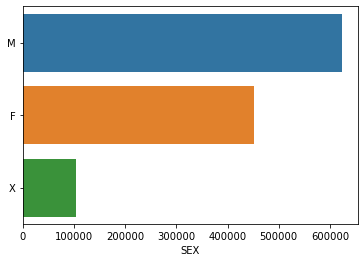

In [30]:
sns.barplot(y=people_eda.SEX.value_counts().index, x=people_eda.SEX.value_counts(),
           orient='h');

In [31]:
pd.crosstab(people_eda.SEX, people_eda.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724
X,4,57,102744,171,93


## After some basic modeling, we determine several main predictors.

In order to do more detailed EDA, we will merge the two datasets, dropping unecessary columns.

###  Dropping columns/basic cleaning

First we drop all columns in which missing values make up more than 80%.

In [32]:
def dropna_columns(df, threshold=.8):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=80%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [33]:
crashes_dropped_df = dropna_columns(crashes_df)
people_dropped_df = dropna_columns(people_df)

In [34]:
crashes_dropped_df.shape

(541142, 41)

In [35]:
people_dropped_df.shape

(1195747, 22)

In [36]:
crashes_dropped_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [37]:
people_dropped_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

####  Next by content we don't want/need

**Columns to drop:**

Crashes:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `REPORT_TYPE` not relevant to conditions in a crash
 - `CRASH_DATE` (redundant w/`people_df`)
 - `DATE_POLICE_NOTIFIED`
 - `STREET_NO`, `STREET_DIRECTION`, `STREET_NAME` are all location related; just use lat/long
 - All the `INJURIES_` columns--colinearity issues w/individual injury data
 
People:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `CITY` and `ZIPCODE`; just use `STATE` to determine driver residence

In [38]:
crashes_cols_to_drop = ['CRASH_DATE', 'RD_NO', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_DIRECTION', 
                        'STREET_NAME', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                        'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'INJURIES_UNKNOWN', 'MOST_SEVERE_INJURY']
people_cols_to_drop = ['RD_NO', 'CITY', 'ZIPCODE']

In [39]:
crashes_dropped_df = crashes_dropped_df.drop(crashes_cols_to_drop, axis=1)
people_dropped_df = people_dropped_df.drop(people_cols_to_drop, axis=1)

In [40]:
crashes_dropped_df.shape

(541142, 26)

In [41]:
people_dropped_df.shape

(1195747, 19)

## Merging all the data into one dataframe

Since we are focusing on predicting individual outcomes in crashes, we will merge on `people_dropped_df` in a left join with `crashes_dropped_df`. This will allow us to create a `TARGET` column based on the injury that each individual person incurred during the crash.

In [42]:
people_crashes_df = people_dropped_df.merge(crashes_dropped_df, on='CRASH_RECORD_ID', how='left')

In [43]:
people_crashes_df.shape

(1195747, 44)

In [44]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [45]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

## Final visualization of 3 strongest predictors

We'll look at the effect of sex, roadway lighting, and safety equipment use on severity of injuries.

### Helper functions:

These functions will be used to prepare the data for visualization.

In [46]:
def combine_minor_injuries(crosstab_df):
    '''
    Combine 'NONINCAPACITATING INJURY' column with 'REPORTED, NOT EVIDENT'
    to create one 'NONINCAPACITATING INJURY' column, then drop 'REPORTED, NOT EVIDENT'.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy['NONINCAPACITATING INJURY'] = crosstab_df_copy['NONINCAPACITATING INJURY'] + crosstab_df_copy['REPORTED, NOT EVIDENT']
    crosstab_df_copy.drop(['REPORTED, NOT EVIDENT'], axis=1, inplace=True)
    return crosstab_df_copy

In [47]:
def normalize_data(crosstab_df):
    '''
    Normalize values down a column in a dataframe,
    specifically for crosstab dataframes using pd.crosstab()
    '''
    crosstab_df_copy = crosstab_df.copy()
    for col in crosstab_df_copy.columns:
        crosstab_df_copy[col] = crosstab_df_copy[col].apply(lambda x: x/crosstab_df_copy[col].sum())
    return crosstab_df_copy

In [48]:
def reorder_columns(crosstab_df):
    '''
    Order columns in same order as our target classes.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy = crosstab_df_copy[['NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL']]
    return crosstab_df_copy

In [49]:
def process_crosstab_df(crosstab_df):
    '''
    Combine previous three functions to provide a fully reformatted crosstab df,
    then transpose so it's ready for visualization.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy = combine_minor_injuries(crosstab_df_copy)
    crosstab_df_copy = normalize_data(crosstab_df_copy)
    crosstab_df_copy = reorder_columns(crosstab_df_copy)
    return crosstab_df_copy.T

### Sex

Our models indicate that sex is a strong predictor of injury, especially fatality.

In [50]:
# Create the crosstab table
injuries_by_sex = pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2]
injuries_by_sex

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724


In [51]:
# Prep for viz
injuries_by_sex_norm = process_crosstab_df(injuries_by_sex)
injuries_by_sex_norm

SEX,F,M
INJURY_CLASSIFICATION,,
NO INDICATION OF INJURY,0.413114,0.586886
NONINCAPACITATING INJURY,0.501348,0.498652
INCAPACITATING INJURY,0.435967,0.564033
FATAL,0.258165,0.741835


In [52]:
# Baseline percentages of sexes in the dataset
people_crashes_df.SEX.value_counts(normalize=True)

M    0.528931
F    0.383511
X    0.087557
Name: SEX, dtype: float64

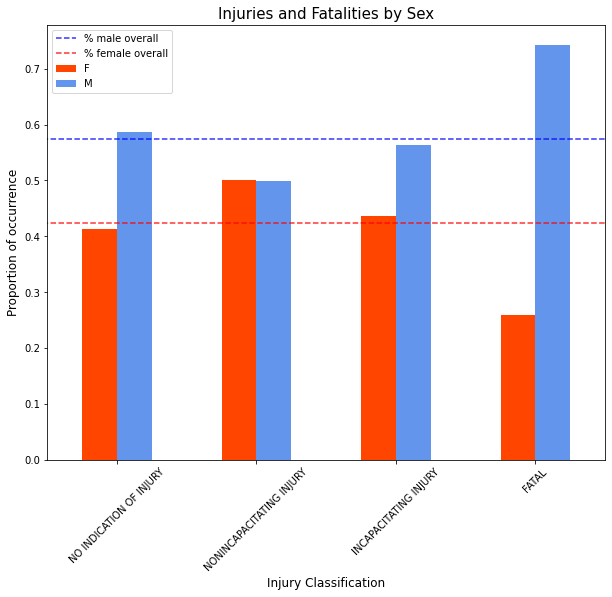

In [53]:
# Graph the crosstab table
fig, ax = plt.subplots(figsize=(10, 8))
injuries_by_sex_norm.plot.bar(ax=ax, color=('orangered', 'cornflowerblue'))
plt.title('Injuries and Fatalities by Sex', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)

# Add lines to show the baseline percentages of male and female drivers in crashes
plt.hlines(y=0.574415, xmin=-50, xmax=100, alpha=0.8, color='blue', ls='--', label='% male overall')
plt.hlines(y=0.424224, xmin=-50, xmax=100, alpha=0.8, color='red', ls='--', label='% female overall')

plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Lighting conditions

It's perhaps not surprising that there are more fatalities at night, but it is unexpected that these fatalities happen primarily on lighted roads! Perhaps drivers feel more safe or overestimate their visibility, thus leading them to speed or drive less safely?

In [54]:
lighting_injuries = pd.crosstab(people_crashes_df.LIGHTING_CONDITION, people_crashes_df.INJURY_CLASSIFICATION)
lighting_injuries

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
LIGHTING_CONDITION,,,,,
DARKNESS,40,506,50229,2466,1306
"DARKNESS, LIGHTED ROAD",333,3442,229530,16396,8043
DAWN,12,253,17548,998,569
DAYLIGHT,250,6240,734852,33220,20830
DUSK,17,301,34701,1816,986
UNKNOWN,4,85,29423,400,358


In [55]:
lighting_injuries_norm = process_crosstab_df(lighting_injuries)
lighting_injuries_norm

LIGHTING_CONDITION,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN
INJURY_CLASSIFICATION,,,,,,
NO INDICATION OF INJURY,0.045818,0.209371,0.016007,0.670312,0.031653,0.026839
NONINCAPACITATING INJURY,0.043164,0.279661,0.017932,0.618506,0.032064,0.008674
INCAPACITATING INJURY,0.046735,0.317909,0.023368,0.576337,0.027801,0.007851
FATAL,0.060976,0.507622,0.018293,0.381098,0.025915,0.006098


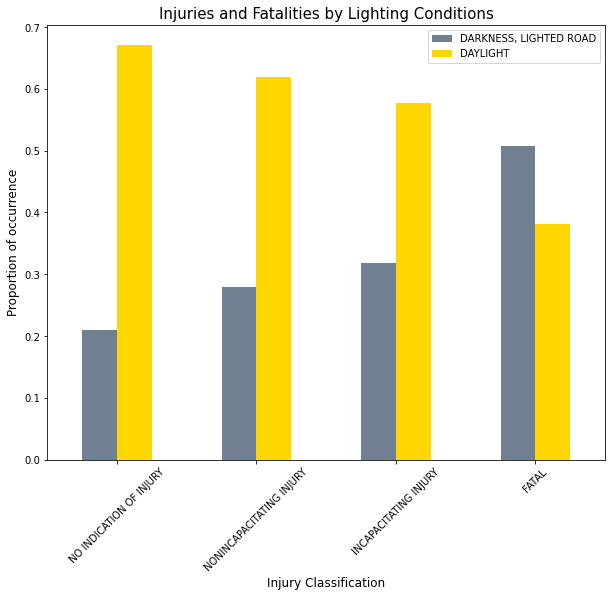

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
lighting_injuries_norm[['DARKNESS, LIGHTED ROAD', 'DAYLIGHT']].plot.bar(ax=ax, color=('slategray', 'gold'))
plt.title('Injuries and Fatalities by Lighting Conditions', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.legend()
plt.xticks(rotation = 45);

### Use of safety equipment

It is not surprising at all that using safety equipment consistently prevents injury and fatality. Although these categories are disaggregated by child, motorcycle, and car, we combine these to get an overall view of the effectiveness of safety equipment.

The data also include categories for equipment used improperly, but this is a very small proportion of the total.

In [57]:
safety_equip = pd.crosstab(people_crashes_df.SAFETY_EQUIPMENT, 
            people_crashes_df.INJURY_CLASSIFICATION).drop(['USAGE UNKNOWN', 
                                                           'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 
                                                           'STRETCHER', 'WHEELCHAIR']).T
safety_equip

SAFETY_EQUIPMENT,BOOSTER SEAT,CHILD RESTRAINT - FORWARD FACING,CHILD RESTRAINT - REAR FACING,CHILD RESTRAINT - TYPE UNKNOWN,CHILD RESTRAINT NOT USED,CHILD RESTRAINT USED,CHILD RESTRAINT USED IMPROPERLY,DOT COMPLIANT MOTORCYCLE HELMET,HELMET NOT USED,HELMET USED,NONE PRESENT,NOT DOT COMPLIANT MOTORCYCLE HELMET,SAFETY BELT NOT USED,SAFETY BELT USED,SHOULD/LAP BELT USED IMPROPERLY
INJURY_CLASSIFICATION,,,,,,,,,,,,,,,
FATAL,0,0,0,0,2,1,0,13,34,9,120,2,50,70,0
INCAPACITATING INJURY,5,9,2,7,7,22,3,100,581,152,1838,24,253,3566,1
NO INDICATION OF INJURY,535,2058,1008,1015,469,7269,66,252,1427,486,26529,63,5497,550295,95
NONINCAPACITATING INJURY,25,88,35,69,66,283,14,243,2220,553,6537,34,854,23107,13
"REPORTED, NOT EVIDENT",23,52,34,37,31,240,7,38,466,144,2334,6,328,17888,6


In [58]:
# Combine USED PROPERLY
safety_equip['USED PROPERLY'] = safety_equip['CHILD RESTRAINT USED'] + safety_equip['BOOSTER SEAT']\
                              + safety_equip['CHILD RESTRAINT - FORWARD FACING'] + safety_equip['CHILD RESTRAINT - REAR FACING']\
                              + safety_equip['CHILD RESTRAINT - TYPE UNKNOWN'] + safety_equip['HELMET USED']\
                              + safety_equip['DOT COMPLIANT MOTORCYCLE HELMET'] + safety_equip['SAFETY BELT USED']
# Combine NOT USED
safety_equip['NOT USED'] = safety_equip['CHILD RESTRAINT NOT USED'] + safety_equip['HELMET NOT USED']\
                         + safety_equip['NONE PRESENT'] + safety_equip['SAFETY BELT NOT USED']

In [59]:
safety_equip = safety_equip.loc[:, ['USED PROPERLY', 'NOT USED']]
safety_equip_norm = process_crosstab_df(safety_equip.T)
safety_equip_norm

SAFETY_EQUIPMENT,USED PROPERLY,NOT USED
INJURY_CLASSIFICATION,,
NO INDICATION OF INJURY,0.943164,0.056836
NONINCAPACITATING INJURY,0.769530,0.230470
INCAPACITATING INJURY,0.590492,0.409508
FATAL,0.311037,0.688963


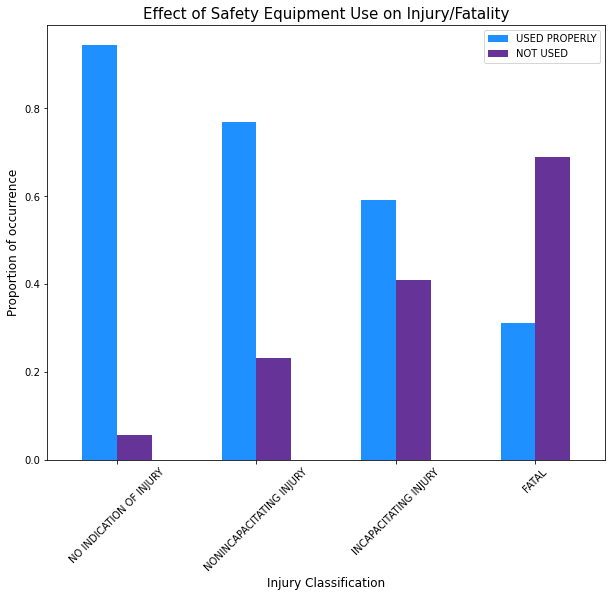

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
safety_equip_norm.plot.bar(ax=ax, color=('dodgerblue', 'rebeccapurple'))
plt.title('Effect of Safety Equipment Use on Injury/Fatality', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.legend()
plt.xticks(rotation = 45);